# Project Part B: Customer Churn Prediction

# Video Link:
https://drive.google.com/file/d/1u7-qevaFtG1KaHE9MEzfo8YF86DPETPZ/view?usp=sharing

In [3]:
# Importing Required Libraries and Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

In [4]:
# Loading the dataset
df=pd.read_csv('Customer_data.csv')

# Reading first 5 rows from dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Task 1: Data Exploration and Preprocessing

In [6]:
# Displaying basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Displaying number of rows and columns present in the dataframe
df.shape

(7043, 21)

In [8]:
# Displaying statistical information of the dataframe 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
# Checking if there are any null values or missing values present in the dataframe
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Filling the null values with the mean of the column
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [11]:
# Dropping rows with missing values
df = df.dropna()  

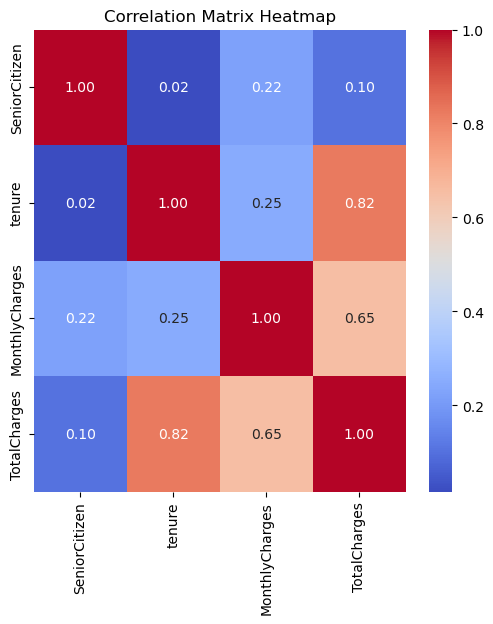

In [12]:
# Understanding the important numerical features in the dataset

# Calculating the correlation matrix for only numerical columns
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Creating the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Adding title to the plot
plt.title('Correlation Matrix Heatmap')

# Showing the plot
plt.show()

# Observations:
Tenure and Total Charges are highly correlated, so these columns can be considered in our analysis.

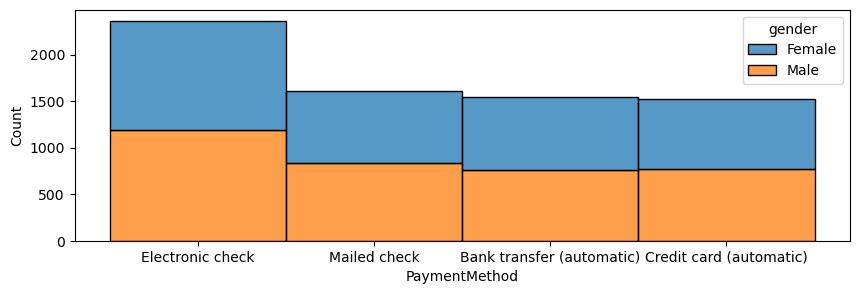

In [14]:
# Creating histogram plot for Payment Method
plt.figure(figsize=(10,3))
sns.histplot(data=df, x=df['PaymentMethod'],hue='gender',multiple='stack',kde=False)  
# Displaying the plot
plt.show()

# Observations:
Electronic Check is the most frequent Payment Method used by both Male and Female customers.

In [16]:
# Displaying top 15 property names
top_10_values = df['InternetService'].value_counts()
top_10_values

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

# Observations:
Fiber optic is the most preferred Internet Service by customers.

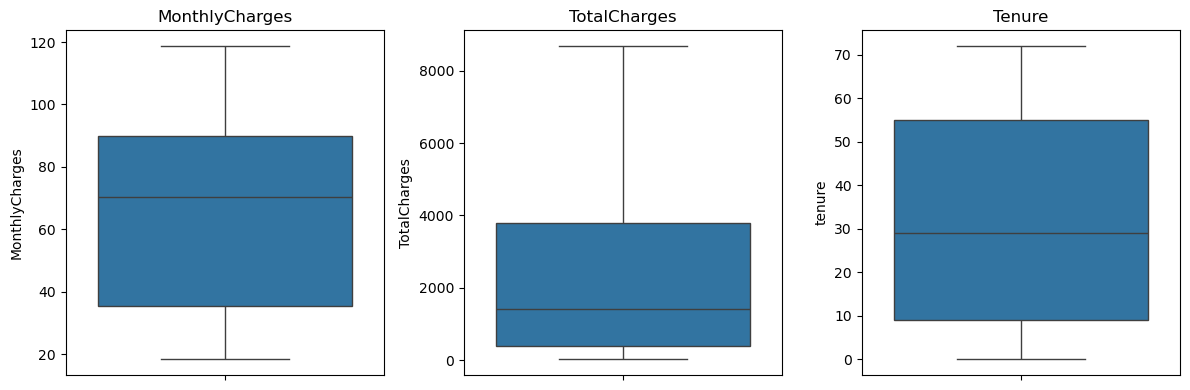

In [18]:
# Creating subplots with 1 row and 3 columns
plt.figure(figsize=(12, 4))

# Plotting for 'MonthlyCharges'
plt.subplot(1, 3, 1)
sns.boxplot(data=df['MonthlyCharges'])
plt.title('MonthlyCharges')

# Plotting for 'TotalCharges'
plt.subplot(1, 3, 2)
sns.boxplot(data=df['TotalCharges'])
plt.title('TotalCharges')

# Plotting for 'tenure'
plt.subplot(1, 3, 3)
sns.boxplot(data=df['tenure'])
plt.title('Tenure')

# Displaying the plots
plt.tight_layout() 
plt.show()


# Observations:
There are no outliers in Monthly charges, total Charges and tenure features. But IQR is different for all three features.

In [20]:
#checking for the duplicates
df.duplicated().sum()

0

In [21]:
final_df=df.copy()
final_df=final_df.drop(columns=['customerID'],axis=1)

In [22]:
#Encoding Categorical Varaibles
label_encoders={}

# Selecting categorical columns
categorical_list = final_df.select_dtypes(include=['object']).columns

for i in categorical_list:
    le=LabelEncoder()
    final_df[i]=le.fit_transform(df[i])
    label_encoders[i]=le
final_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [24]:
# Checking if the dataset is balanced or not
churn_value_counts = final_df['Churn'].value_counts()

# Printing the results
print(churn_value_counts)

Churn
0    5174
1    1869
Name: count, dtype: int64


# Observation:
The Dataset is a imbalanced dataset as the number of churned customer(Churn column with 1 as value) is less than number of  non-churned customers(Churn column with 0 as value).

In [26]:
# Data Splitting: Divide the data into training and testing sets.

In [27]:
# Creating Input and Output variables
X = final_df.drop(columns=['Churn'],axis=1)
y = final_df['Churn']

# Splitting into train and test sets into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the sizes of train, test and validation sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 5634
Test set size: 1409


In [28]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,1336.800000
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,5129.450000
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.450000
1362,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.950000
6754,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,2283.300441


In [29]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,24.80,24.80
2715,1,0,0,0,41,1,2,2,1,1,1,1,1,1,0,1,0,25.25,996.45
3825,0,0,1,1,52,1,0,2,1,1,1,1,1,1,2,0,3,19.35,1031.70
1807,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,2,76.35,76.35
132,1,0,0,0,67,1,0,0,0,0,0,2,0,0,2,0,0,50.55,3260.10


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   int32  
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   int32  
 3   Dependents        5634 non-null   int32  
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   int32  
 6   MultipleLines     5634 non-null   int32  
 7   InternetService   5634 non-null   int32  
 8   OnlineSecurity    5634 non-null   int32  
 9   OnlineBackup      5634 non-null   int32  
 10  DeviceProtection  5634 non-null   int32  
 11  TechSupport       5634 non-null   int32  
 12  StreamingTV       5634 non-null   int32  
 13  StreamingMovies   5634 non-null   int32  
 14  Contract          5634 non-null   int32  
 15  PaperlessBilling  5634 non-null   int32  
 16  PaymentMethod     5634 non-null   int32  
 17

In [31]:
# Performing Feature Scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Task 2: Model Development 

A machine learning model capable of predicting customer churn. 

# 1. Logistic Regression

In [35]:
# Building Logistic Regression model
logreg = LogisticRegression()  
logreg.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Prediction from the model
logreg_y_pred = logreg.predict(X_test)

# Calculating Accuracy
logreg_accuracy = accuracy_score(y_test,logreg_y_pred)
print("Accuracy:", logreg_accuracy)

# Printing Classification Report
logreg_classification_report=classification_report(y_test, logreg_y_pred)
print("\nClassification Report:")
print(logreg_classification_report)

Accuracy: 0.8161816891412349

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



# Observation:
The Default values for Logistic Regression Class has class_weight set to None. Since this is an imbalanced dataset, performing hyperparameter tuning with balanced class_weight to get better result.

#### Model Tuning: Experiment with different models and tune hyperparameters to optimize performance.

In [38]:
# Parameter list
logreg_param_grid = {'C': [0.01, 0.1, 1, 10, 100],            
                    'penalty': ['l1', 'l2'],                 
                    'solver': ['liblinear'], 
                    'max_iter': [100, 200, 300],
                    'class_weight':['balanced']
                    }

In [39]:
# Building Logistic Regression model
logreg = LogisticRegression()

# Setting up GridSearchCV
logreg_grid_search = GridSearchCV(estimator=logreg, param_grid=logreg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fitting the model using GridSearchCV
logreg_grid_search.fit(X_train, y_train)

# Printing the best hyperparameters and best score
print("Best Parameters:", logreg_grid_search.best_params_)
print("Best Accuracy:", logreg_grid_search.best_score_)

Best Parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.7406822053865951


#### Observation:
After hyperparameter tuning for the Logistic Regression model, accuracy is 74.06% but has class_weight is set to balanced. We can consider during model evaluation as the accuracy value is above 73%.

# 2. KNN

In [42]:
# Building KNN model
knn = KNeighborsClassifier()  
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
# Prediction from the model
knn_y_pred = knn.predict(X_test)

# Calculating accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy:", knn_accuracy)

# Printing Classification Report
knn_classification_report=classification_report(y_test, knn_y_pred)
print("\nClassification Report:")
print(knn_classification_report)

Accuracy: 0.7572746628814763

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.54      0.50      0.52       373

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.75      1409



# Observation:
The Default values for KNN Class has class_weight set to uniform. Since this is an imbalanced dataset, performing hyperparameter tuning to get better result.

#### Model Tuning: Experiment with different models and tune hyperparameters to optimize performance.

In [45]:
# Parameter list
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11],              
                  'weights': ['uniform', 'distance'],           
                  'algorithm': ['auto', 'ball_tree', 'kd_tree']}

In [46]:
# Initializing knn model
knn = KNeighborsClassifier()

# Setting up GridSearchCV
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fitting the model using GridSearchCV
knn_grid_search.fit(X_train, y_train)

# Printing the best hyperparameters and best score
print("Best Parameters:", knn_grid_search.best_params_)
print("Best Accuracy:", knn_grid_search.best_score_)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}
Best Accuracy: 0.7648194407889033


# Observation:
After hyperparameter tuning for the KNN model, accuracy has improved from 75.72% to 76.48%. And considering during the model evaluation as the accuracy value is above 73%.

# 3. Decision Tree

In [49]:
# Building Decision Tree model
dt = DecisionTreeClassifier()  
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
# Prediction from the model
dt_y_pred = dt.predict(X_test)

# Calculating accuracy
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Accuracy:", dt_accuracy)

# Printing Classification Report
dt__classification_report=classification_report(y_test, dt_y_pred)
print("\nClassification Report:")
print(dt__classification_report)

Accuracy: 0.7331440738112136

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.50      0.50      0.50       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



# Observation:
The Default values for Decision Tree Class has class_weight set to None. Since this is an imbalanced dataset, performing hyperparameter tuning with balanced class_weight to get better result.

#### Model Tuning: Experiment with different models and tune hyperparameters to optimize performance.

In [52]:
# Parameter list
dt_param_grid = {'criterion': ['gini', 'entropy'], 
                 'max_depth': [5, 10, 15, 20], 
                 'min_samples_split': [2, 5, 10, 15],
                 'min_samples_leaf': [1, 2, 5, 10],
                'class_weight': ['balanced'] }

In [53]:
# Initializing Decision Tree model
dt = DecisionTreeClassifier()

# Set up GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model using GridSearchCV
dt_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best Parameters:", dt_grid_search.best_params_)
print("Best Accuracy:", dt_grid_search.best_score_)

Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.7452957520949532


# Observation:
After hyperparameter tuning for the Decision Tree model, accuracy has improved from 73.31% to 74.28%. Considering this during model evaluation as the accuracy value is above 73%.

# 4. Random Forest

In [56]:
# Building Random Forest model
rf = RandomForestClassifier()  
rf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
# Prediction from the model
rf_y_pred = rf.predict(X_test)

# Calculating accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy:", rf_accuracy)

# Printing Classification Report
rf__classification_report=classification_report(y_test, rf_y_pred)
print("\nClassification Report:")
print(rf__classification_report)

Accuracy: 0.801277501774308

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.68      0.47      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



# Observation:
The Default values for Random Forest Class has class_weight set to None. Since this is an imbalanced dataset, performing hyperparameter tuning with balanced class_weight to get better result.

#### Model Tuning: Experiment with different models and tune hyperparameters to optimize performance.

In [59]:
# Parameter list
rf_param_grid = { 'n_estimators': [100, 200, 300],               
                  'max_depth': [10, 20, 30],                
                  'min_samples_split': [2, 5, 10],                               
                  'criterion': ['gini', 'entropy'],
                  'class_weight': ['balanced']}

In [60]:
# Initializing Random Forest model
rf = RandomForestClassifier()

# Setting up GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fitting the model using GridSearchCV
rf_grid_search.fit(X_train, y_train)

# Printing the best hyperparameters and best score
print("Best Parameters:", rf_grid_search.best_params_)
print("Best Accuracy:", rf_grid_search.best_score_)

Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy: 0.7944608440333427


# Observation:
After hyperparameter tuning for the Random Forest model, accuracy value has gone from 80.12% to 79.44%. But this value is better than all other models when the class_weight is set to balanced. So considering Random Forest Algorithm during the evaluation of the model performance.

# 5. SVM

In [63]:
# Building SVM model
svm = SVC()  
svm.fit(X_train, y_train)

SVC()

In [64]:
# Prediction from the model
svm_y_pred = svm.predict(X_test)

# Calculating accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy:", svm_accuracy)

# Printing Classification Report
svm__classification_report=classification_report(y_test,svm_y_pred)
print("\nClassification Report:")
print(svm__classification_report)

Accuracy: 0.8069552874378992

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1036
           1       0.68      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



# Observation:
The Default values for SVM Class has class_weight set to None. Since this is an imbalanced dataset, performing hyperparameter tuning with balanced class_weight to get better result.

#### Model Tuning: Experiment with different models and tune hyperparameters to optimize performance.

In [66]:
svm_param_grid = {'C': [0.1, 1, 10, 100],            
                  'kernel': ['linear', 'rbf', 'poly'],  
                  'gamma': ['scale', 'auto', 0.001, 0.01],
                 'class_weight': ['balanced'] }

In [67]:
# Initializing svm model
svm = SVC()

# Setting up GridSearchCV
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fitting the model using GridSearchCV
svm_grid_search.fit(X_train, y_train)

# Printing the best hyperparameters and best score
print("Best Parameters:", svm_grid_search.best_params_)
print("Best Accuracy:", svm_grid_search.best_score_)

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.7383751956261693


# Observation:
After hyperparameter tuning for the SVM model, accuracy value is less 73.83% and less when compared to Random Forest algorithm. But considering during the model evaluation as the accuracy value is above 73%.

# Task 3: Model Evaluation 

#### An evaluation of model performance using appropriate metrics (such as accuracy, precision, recall, F1 score, etc.).

# 1.Logistic Regression 

In [93]:
# Building Logistic Regression model
logreg = LogisticRegression(C=10, class_weight='balanced', max_iter=100, penalty='l1', solver='liblinear')  
logreg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [95]:
# Prediction from the model
logreg_y_pred = logreg.predict(X_test)

# Calculating Accuracy
logreg_accuracy = accuracy_score(y_test,logreg_y_pred)
print("Accuracy:", logreg_accuracy)

# Printing Classification Report
logreg_classification_report=classification_report(y_test, logreg_y_pred)
print("\nClassification Report:")
print(logreg_classification_report)

Accuracy: 0.7565649396735273

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.73      0.81      1036
           1       0.53      0.84      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



# Observation:
Using Logistic Regression model:
1. We are getting 75.65% accuracy on this dataset. So the model is correctly predicting Churned customers and Non Churned Customers 75% of times.
2. The model is doing good on non churned customers records as the precision and recall is 93% and 73% respectively with F1 Score of 81%.
3. Also, the model has recall of 84% on churned customers, indicating that out of all actual churned customers, 84% were correctly identified as churned customers.
4. Also, precision is 53% on churned customers, indicating that out of all the customers predicted as churned, 53% were correctly identified as churned customers with F1 Score of 65%. 

# 2. KNN

In [101]:
# Building KNN model
knn = KNeighborsClassifier(algorithm='auto', n_neighbors= 9, weights= 'uniform')  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [103]:
# Prediction from the model
knn_y_pred = knn.predict(X_test)

# Calculating accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy:", knn_accuracy)

# Printing Classification Report
knn_classification_report=classification_report(y_test, knn_y_pred)
print("\nClassification Report:")
print(knn_classification_report)

Accuracy: 0.7743080198722498

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1036
           1       0.58      0.53      0.55       373

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.77      0.77      1409



# Observation:
Using KNN model:
1. We are getting 77.43% accuracy on this dataset. So the model is correctly predicting Churned customers and Non Churned Customers 77% of times.
2. The model is doing good on non churned customers records as the precision and recall is 83% and 86% respectively with F1 score of 85%.
3. But precision and recall is 58% and 53% on churned customers.Indicating that model is not doing well on churned customers with F1 score of 55%.

# 3. Decision Tree

In [110]:
# Building Decision Tree model
dt = DecisionTreeClassifier(class_weight= 'balanced', criterion='entropy', max_depth= 20, min_samples_leaf= 1, min_samples_split= 2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20)

In [112]:
# Prediction from the model
dt_y_pred = dt.predict(X_test)

# Calculating accuracy
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Accuracy:", dt_accuracy)

# Printing Classification Report
dt__classification_report=classification_report(y_test, dt_y_pred)
print("\nClassification Report:")
print(dt__classification_report)

Accuracy: 0.7104329311568488

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1036
           1       0.45      0.46      0.46       373

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409



# Observation:
Using Decision Tree model:
1. We are getting 71.04% accuracy on this dataset. So the model is correctly predicting Churned customers and Non Churned Customers 71% of times.
2. The model is doing good on non churned customers records as the precision and recall is 81% and 80% respectively with F1 Score of 80%.
3. But precision and recall is 45% and 46% on churned customers.Indicating that model is not doing well on churned customers with F1 Score of 46%.

# 4. Random Forest

In [116]:
# Building Random Forest model
rf = RandomForestClassifier(class_weight= 'balanced', criterion= 'entropy', max_depth= 30, min_samples_split= 2, n_estimators= 300)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30, n_estimators=300)

In [118]:
# Prediction from the model
rf_y_pred = rf.predict(X_test)

# Calculating accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy:", rf_accuracy)

# Printing Classification Report
rf__classification_report=classification_report(y_test, rf_y_pred)
print("\nClassification Report:")
print(rf__classification_report)

Accuracy: 0.7877927608232789

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409



# Observation:
Using Random Forest model:
1. We are getting 78.77% accuracy on this dataset. So the model is correctly predicting Churned customers and Non Churned Customers 78% of times.
2. The model is doing good on non churned customers records as the precision and recall is 82% and 90% respectively with 86% as F1 score.
3. Also, the model has precision of 64% on churned customers, indicating that out of all the customers predicted as churned, 64% were correctly identified as churned customers. 
4. Also, recall is 47% on churned customers, indicating that out of all actual churned customers, 47% were correctly identified as churned customers with F1 score of 54%.

# 5. SVM

In [127]:
# Building SVM model
svm = SVC(C= 1, class_weight= 'balanced', gamma='scale', kernel='rbf')  
svm.fit(X_train, y_train)

SVC(C=1, class_weight='balanced')

In [129]:
# Prediction from the model
svm_y_pred = svm.predict(X_test)

# Calculating accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy:", svm_accuracy)

# Printing Classification Report
svm__classification_report=classification_report(y_test,svm_y_pred)
print("\nClassification Report:")
print(svm__classification_report)

Accuracy: 0.7530163236337828

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1036
           1       0.52      0.79      0.63       373

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.77      1409



# Observation:
Using SVM model:
1. We are getting 75.30% accuracy on this dataset. So the model is correctly predicting Churned customers and Non Churned Customers 75% of times.
2. The model is doing good on non churned customers records as the precision and recall is 91% and 74% respectively with 82% as F1 score.
3. Also, the model has recall of 79% on churned customers, indicating that out of all actual churned customers, 79% were correctly identified as churned customers.
4. Also, precision is 52% on churned customers,  indicating that out of all the customers predicted as churned, 52% were correctly identified as churned customers. Also, F1 Score is 63% on on churned customers.

#### Visualisation for Random Forest Model

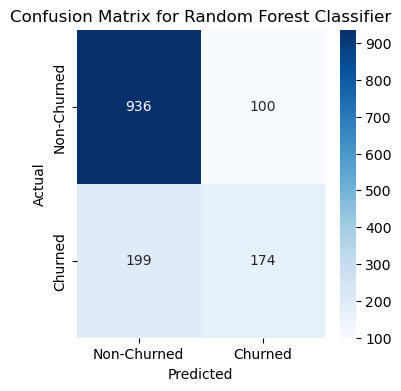

In [155]:
# Generating confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)

# Plotting confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churned', 'Churned'], yticklabels=['Non-Churned', 'Churned'])

# Setting labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')

# Displaying plot
plt.show()

# Observation:
1. Out of 1036 Actual Non-Churned Customers, the model has predicted 936 non churned customers correctly, indicating that the model is performing well on Non-Churned Customers unseen data.
2. Out of 373 Actual Churned Customers, the model has predicted 174 churned customers correctly, indicating that the model is performing well on Churned Customers unseen data.

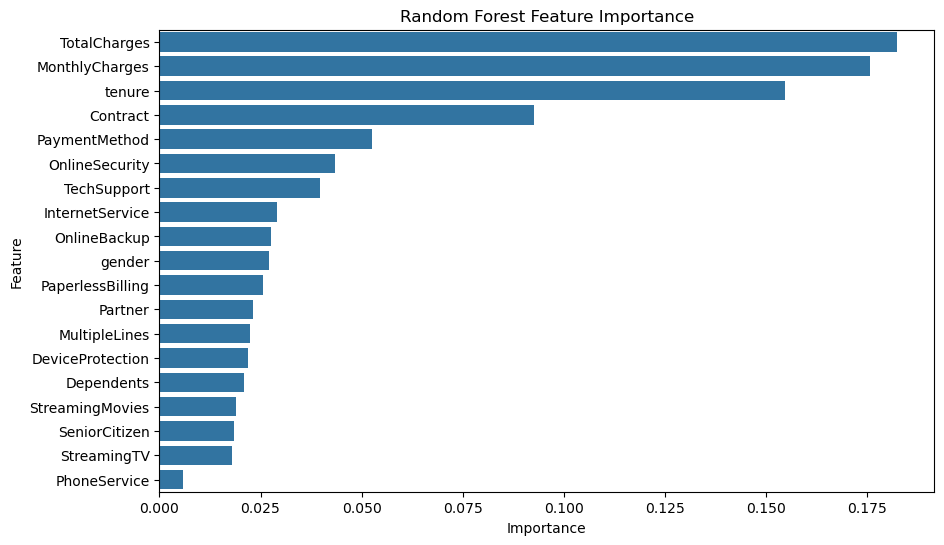

In [165]:
# Creating bar chart to know the important features in the dataset
# Creating actual feature names list
actual_feature_names = ['gender','SeniorCitizen','Partner','Dependents','tenure',	'PhoneService',	'MultipleLines','InternetService',
                          'OnlineSecurity',	'OnlineBackup', 'DeviceProtection',	'TechSupport','StreamingTV','StreamingMovies',
                          'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']

# Getting feature importance from the Random Forest model
feature_importance = rf.feature_importances_

# Creating dataFrame with feature names and their importance
feature_df = pd.DataFrame({'Feature': actual_feature_names, 'Importance': feature_importance})

# Sorting dataFrame by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Random Forest Feature Importance')
plt.show()


# Observation:
1. Total Charges feature is the top most important feature in this dataset with a high feature importance value.
2. Monthly charges, tenure, contract, payment method features are other important features in this dataset.
3. Dependents, Streaming Movies, Senior Citizen, Straming TV, Phone Service are the least important features in the dataset.

# Final Insights:
1. The given dataset is imbalanced where number of churned customers is less than number of non-churned customers.In order to have balance in the dataset, have used class weight parameter in all the algorithms.
2. Without hyperparameter tuning on imbalanced dataset, all models gave very good accuracy. But after hyperparameter tuning, the accuracy value was less but is still acceptable as it was applied on balanced dataset.
3. Among them Random Forest is the best model for predicting customer churn. Below are the reasons:
4. It has highest accuracy of 78.77% when compared to all other models.
5. For Churned Customers, the precision is 64% which is higher than all other models. Recall is 47% which is less than other algorithms but is still acceptable when overall performance is considered.
6. Also, F1 Score is 54% for churned customers, which balances precision and recall better than other models.
7. The weighted average for Random Forest is 78%, which is the highest compared to all other models. This indicates that it is consistently good across both classes (non-churned and churned customers).
8. Random Forest has relatively good performance even if its recall for churned customers could be slightly higher.
9. KNN does well with churned customers (higher recall of 0.53 and precision of 0.58) but its overall accuracy isn't as high as Random Forest.
10. Logistic Regression and SVM are better at classifying non-churned customers (class 0) but do not perform well when predicting churned customers.